In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
raw_data = yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',
                              auto_adjust = True, treads = True)
#Comparing Volks and Porshe
#Using BMW(another Automobile in German market) as the Benchmark

[*********************100%***********************]  3 of 3 completed


In [3]:
df = raw_data.copy()

In [4]:
start_date = '2009-04-05'

#VW announces they own 49.9% of Porche
ann_1 = '2009-12-09'

#VW obtains full ownership - remaining 50.1% of Porche
ann_2 = '2012-07-05'

end_date = '2015-01-01'

dieselgate_scandal = '2015-09-20'

aftermath = '2017-01-01'

In [5]:
#Closing prices
df['volk'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

#Creating Returns
df['ret_volk'] = df['volk'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

In [6]:
#Creating Squared returns
df['sq_volk'] = df.ret_volk.mul(df.ret_volk)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)
#Extracting Volume, number of purchases and sales each day
df['q_volk'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [7]:
df = df.asfreq('b')
df = df.fillna(method = 'bfill')

In [8]:
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

In [9]:
df.head()

,volk,por,bmw,ret_volk,ret_por,ret_bmw,sq_volk,sq_por,sq_bmw,q_volk,q_por,q_bmw
,,,,,,,,,,,,
Date,,,,,,,,,,,,
1996-11-08,32.022877,25.596836,9.333747,-4.405663,-3.831339,-0.269691,19.409866,14.679155,0.072733,56336.0,901566.0,767000.0
1996-11-11,32.022877,25.596836,9.308575,-4.405663,-3.831339,-0.269691,19.409866,14.679155,0.072733,56336.0,901566.0,260000.0
1996-11-12,32.022877,25.596836,9.378949,-4.405663,-3.831339,0.756018,19.409866,14.679155,0.571563,56336.0,901566.0,1066000.0
1996-11-13,32.022877,25.596836,9.364053,-4.405663,-3.831339,-0.158828,19.409866,14.679155,0.025226,56336.0,901566.0,793000.0
1996-11-14,32.022877,25.596836,9.394358,-4.405663,-3.831339,0.323630,19.409866,14.679155,0.104737,56336.0,901566.0,351000.0


In [10]:
df.isnull().sum()

volk          0
por           0
bmw           0
ret_volk      0
ret_por       0
ret_bmw       0
sq_volk       0
sq_por        0
sq_bmw        0
q_volk        0
q_por         0
q_bmw         0
dtype: int64

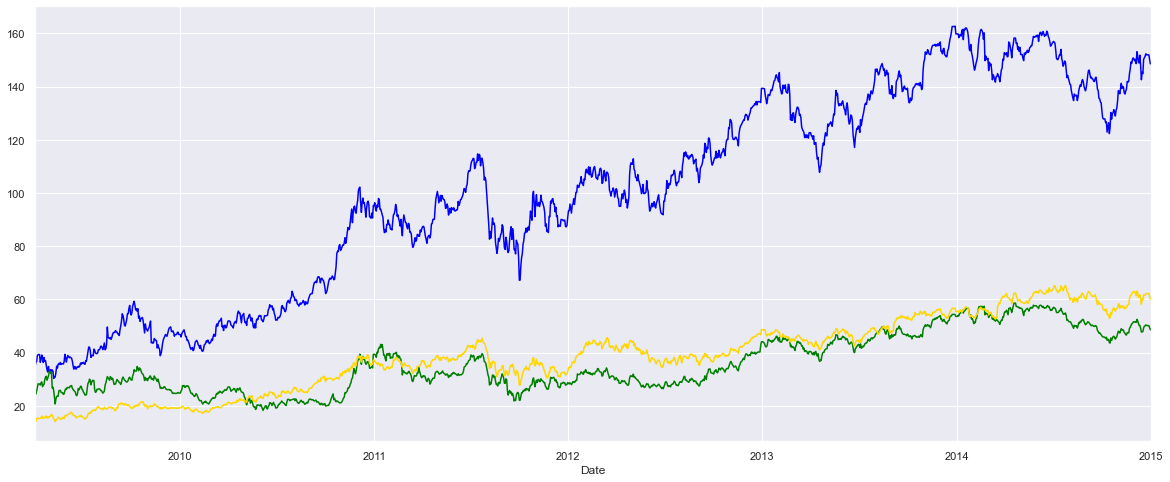

In [11]:
df['volk'][start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][start_date:end_date].plot(color = "green")
df['bmw'][start_date:end_date].plot(color = "gold")
plt.show()

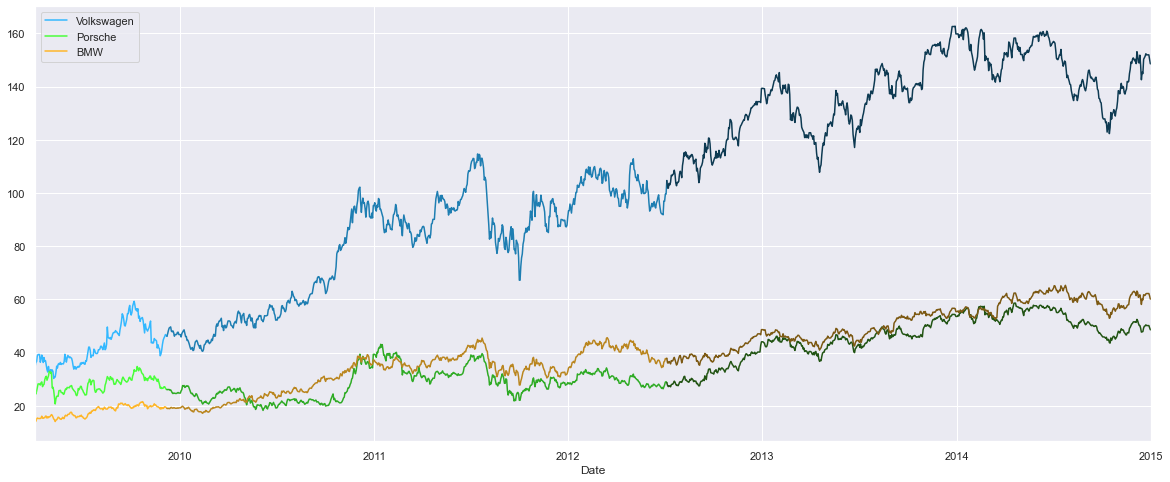

In [12]:
df['volk'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

df['volk'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

df['volk'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

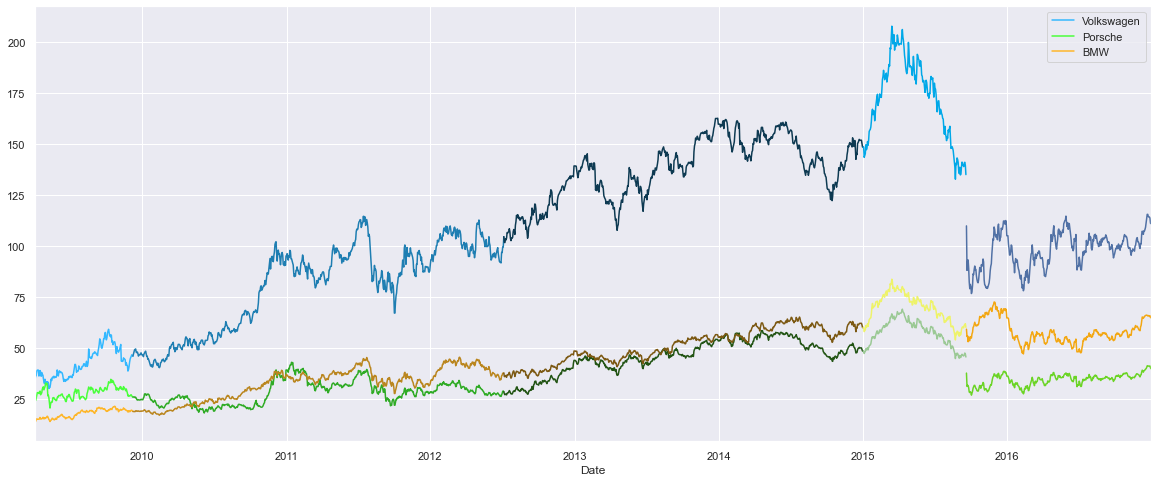

In [13]:
df['volk'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

df['volk'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

df['volk'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

df['volk'][end_date: dieselgate_scandal].plot(color = "#00A8E8")
df['por'][end_date: dieselgate_scandal].plot(color = "#9BC995")
df['bmw'][end_date: dieselgate_scandal].plot(color = "#EEF36A")

df['volk'][dieselgate_scandal:aftermath].plot(color = "#5171A5")
df['por'][dieselgate_scandal:aftermath].plot(color = "#6BD425")
df['bmw'][dieselgate_scandal:aftermath].plot(color = "#F3A712")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

In [14]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['volk'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['volk'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2015-01-01

Volkswagen and Porsche correlation: 	0.8869730920690446
Volkswagen and BMW correlation: 	0.9713559261262787
Porsche and BMW correlation: 		0.8887340623648688


In [15]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['volk'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t'+ str(df['volk'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633583516530022
Volkswagen and BMW correlation: 	0.8427607542652235
Porsche and BMW correlation: 		0.6095038408676919


In [16]:
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['volk'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t'+ str(df['volk'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7428268031581171
Volkswagen and BMW correlation: 	0.9795943029138778
Porsche and BMW correlation: 		0.7042723257590434


In [17]:
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['volk'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['volk'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2015-01-01

Volkswagen and Porsche correlation: 	0.9465576215991262
Volkswagen and BMW correlation: 	0.8472303987845448
Porsche and BMW correlation: 		0.9132323220129176


In [18]:
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(dieselgate_scandal)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['volk'][end_date:dieselgate_scandal].corr(df['por'][end_date:dieselgate_scandal])))
print('Volkswagen and BMW correlation: \t'+ str(df['volk'][end_date:dieselgate_scandal].corr(df['bmw'][end_date:dieselgate_scandal])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][end_date:dieselgate_scandal].corr(df['bmw'][end_date:dieselgate_scandal])))

Correlation among manufacturers from 2015-01-01 to 2015-09-20

Volkswagen and Porsche correlation: 	0.992367590180116
Volkswagen and BMW correlation: 	0.961382133603131
Porsche and BMW correlation: 		0.9631012785388197


In [19]:
print('Correlation among manufacturers from ' + str(dieselgate_scandal) + ' to ' + str(aftermath)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['volk'][dieselgate_scandal:aftermath].corr(df['por'][dieselgate_scandal: aftermath])))
print('Volkswagen and BMW correlation: \t'+ str(df['volk'][dieselgate_scandal:aftermath].corr(df['bmw'][dieselgate_scandal:aftermath])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][dieselgate_scandal:aftermath].corr(df['bmw'][dieselgate_scandal:aftermath])))

Correlation among manufacturers from 2015-09-20 to 2017-01-01

Volkswagen and Porsche correlation: 	0.9516386226007254
Volkswagen and BMW correlation: 	0.2740985012816104
Porsche and BMW correlation: 		0.31510560805146304


---

# Best Fitting Model (Price)

### Stationarity test on price

In [20]:
sts.adfuller(df.volk)
#Fail to reject null hypothesis, data is Non-stationarity
#All Automobile prices will follow the same non-stationarity

(-1.1700865712487565,
 0.6863295694611401,
 28,
 6645,
 {'1%': -3.4313344737259253,
  '5%': -2.861975054639216,
  '10%': -2.5670015760306777},
 27520.91953422848)

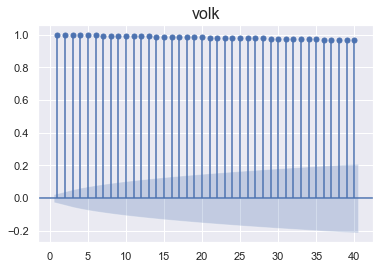

In [21]:
sgt.plot_acf(df.volk, lags = 40, zero = False)
plt.title('volk', size = 16)
plt.show()

### Volkswagen

In [22]:
mod_pr_pre_volk = auto_arima(df.volk[start_date:ann_1], exogenous = df[['por','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_volk = auto_arima(df.volk[ann_1:ann_2], exogenous = df[['por','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_volk = auto_arima(df.volk[ann_2:end_date], exogenous = df[['por','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_pre_dgs_volk = auto_arima(df.volk[end_date:dieselgate_scandal], exogenous = df[['por','bmw']][end_date:dieselgate_scandal],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_dgs_volk = auto_arima(df.volk[dieselgate_scandal:aftermath], exogenous = df[['por','bmw']][dieselgate_scandal:aftermath],
                            m = 5, max_p = 5, max_q = 5)

In [23]:
mod_pr_pre_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -313.553
Date:                Thu, 09 Jun 2022   AIC                            637.106
Time:                        15:22:37   BIC                            653.015
Sample:                    04-06-2009   HQIC                           643.557
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6858      0.424      1.618      0.106      -0.145       1.517
por            0.3925      0.094      4.169      0.000       0.208       0.577
bmw            0.7060      0.335      2.107      0.035       0.049       1.363
ar.L1          0.9633      0.020     48.670      0.000       0.925       1.002
sigma2         1.9550      0.133     14.718      0.000       1.695       2.215
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               166.03
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
mod_pr_btn_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1044.485
Date:                Thu, 09 Jun 2022   AIC                           2094.969
Time:                        15:22:37   BIC                           2108.495
Sample:                    12-09-2009   HQIC                          2100.208
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.7760      0.060     12.842      0.000       0.658       0.894
bmw            1.5801      0.074     21.269      0.000       1.435       1.726
sigma2         1.3170      0.054     24.532      0.000       1.212       1.422
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):               112.42
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
mod_pr_post_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  651
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -942.689
Date:                Thu, 09 Jun 2022   AIC                           1891.379
Time:                        15:22:37   BIC                           1904.810
Sample:                    07-05-2012   HQIC                          1896.588
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.7838      0.040     44.721      0.000       1.706       1.862
bmw            0.7127      0.063     11.395      0.000       0.590       0.835
sigma2         1.0647      0.041     26.116      0.000       0.985       1.145
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               160.05
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
mod_pr_pre_dgs_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  187
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 5)   Log Likelihood                -283.844
Date:                             Thu, 09 Jun 2022   AIC                            577.689
Time:                                     15:22:37   BIC                            593.844
Sample:                                 01-01-2015   HQIC                           584.235
                                      - 09-18-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            2.3439      0.122     19.225      0.000       2.105       2.583
bmw            0.5399      0.098      5.483      0.000       0.347       0.733
ar.L1          0.9315      0.027     34.267      0.000       0.878       0.985
ma.S.L5       -0.1585      0.088     -1.809      0.071      -0.330       0.013
sigma2         1.2064      0.104     11.551      0.000       1.002       1.411
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 8.73
Prob(Q):                              0.50   Prob(JB):                         0.01
Heteroskedasticity (H):               0.59   Skew:                            -0.18
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
mod_pr_post_dgs_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  335
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 5)   Log Likelihood                -444.462
Date:                            Thu, 09 Jun 2022   AIC                            900.925
Time:                                    15:22:37   BIC                            923.792
Sample:                                09-21-2015   HQIC                           910.042
                                     - 12-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            2.9036      0.056     51.637      0.000       2.793       3.014
bmw            0.0353      0.056      0.629      0.529      -0.075       0.145
ar.L1          0.4131      0.186      2.215      0.027       0.048       0.779
ma.L1         -0.6147      0.163     -3.767      0.000      -0.934      -0.295
ar.S.L5        0.1127      0.051      2.219      0.027       0.013       0.212
sigma2         0.8380      0.053     15.828      0.000       0.734       0.942
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                17.39
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Porsche

In [28]:
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous = df[['volk','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous = df[['volk','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous = df[['volk','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_pre_dgs_por = auto_arima(df.por[end_date:dieselgate_scandal], exogenous = df[['volk','bmw']][end_date:dieselgate_scandal],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_dgs_por = auto_arima(df.por[dieselgate_scandal:aftermath], exogenous = df[['volk','bmw']][dieselgate_scandal:aftermath],
                            m = 5, max_p = 5, max_q = 5)

In [29]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -219.737
Date:                Thu, 09 Jun 2022   AIC                            451.474
Time:                        15:23:45   BIC                            470.565
Sample:                    04-06-2009   HQIC                           459.216
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5562      0.363      1.533      0.125      -0.155       1.267
volk           0.1172      0.054      2.157      0.031       0.011       0.224
bmw            0.9170      0.165      5.558      0.000       0.594       1.240
ar.L1          1.0748      0.059     18.194      0.000       0.959       1.191
ar.L2         -0.1589      0.059     -2.716      0.007      -0.274      -0.044
sigma2         0.6837      0.048     14.098      0.000       0.589       0.779
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               559.38
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -558.076
Date:                Thu, 09 Jun 2022   AIC                           1126.153
Time:                        15:23:45   BIC                           1148.697
Sample:                    12-09-2009   HQIC                          1134.884
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
volk           0.1819      0.016     11.134      0.000       0.150       0.214
bmw            0.3449      0.048      7.200      0.000       0.251       0.439
ar.L1          0.6585      0.230      2.860      0.004       0.207       1.110
ma.L1         -0.5898      0.246     -2.395      0.017      -1.072      -0.107
sigma2         0.3090      0.010     32.415      0.000       0.290       0.328
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1076.56
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  651
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -312.860
Date:                Thu, 09 Jun 2022   AIC                            631.720
Time:                        15:23:45   BIC                            645.151
Sample:                    07-05-2012   HQIC                           636.930
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
volk           0.2569      0.009     28.915      0.000       0.239       0.274
bmw            0.1642      0.020      8.022      0.000       0.124       0.204
sigma2         0.1533      0.005     31.675      0.000       0.144       0.163
===================================================================================
Ljung-Box (L1) (Q):                   2.34   Jarque-Bera (JB):               526.87
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
mod_pr_pre_dgs_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  187
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -69.160
Date:                Thu, 09 Jun 2022   AIC                            148.320
Time:                        15:23:45   BIC                            164.476
Sample:                    01-01-2015   HQIC                           154.866
                         - 09-18-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3187      0.166      1.922      0.055      -0.006       0.644
volk           0.2353      0.016     14.565      0.000       0.204       0.267
bmw            0.1680      0.039      4.343      0.000       0.092       0.244
ar.L1          0.9365      0.031     30.007      0.000       0.875       0.998
sigma2         0.1213      0.012      9.995      0.000       0.098       0.145
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):                 6.16
Prob(Q):                              0.25   Prob(JB):                         0.05
Heteroskedasticity (H):               0.98   Skew:                             0.38
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
mod_pr_post_dgs_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(2, 1, 3)   Log Likelihood                 -42.600
Date:                Thu, 09 Jun 2022   AIC                            101.199
Time:                        15:23:45   BIC                            131.689
Sample:                    09-21-2015   HQIC                           113.356
                         - 12-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
volk           0.2666      0.007     37.003      0.000       0.252       0.281
bmw            0.1225      0.016      7.437      0.000       0.090       0.155
ar.L1          0.6459      0.217      2.974      0.003       0.220       1.072
ar.L2         -0.6717      0.175     -3.839      0.000      -1.015      -0.329
ma.L1         -0.8884      0.221     -4.012      0.000      -1.322      -0.454
ma.L2          0.7513      0.221      3.405      0.001       0.319       1.184
ma.L3         -0.2497      0.077     -3.234      0.001      -0.401      -0.098
sigma2         0.0755      0.005     14.315      0.000       0.065       0.086
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.97
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---

# Best Fitting Model (Returns)

### Stationarity test on returns

In [34]:
sts.adfuller(df.ret_volk)

(-5.524926228155053,
 1.8418884519268876e-06,
 35,
 6638,
 {'1%': -3.43133551228931,
  '5%': -2.861975513520853,
  '10%': -2.567001820302746},
 30265.66349501355)

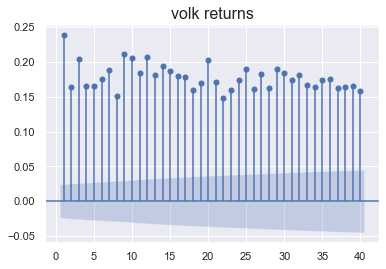

In [35]:
sgt.plot_acf(df.ret_volk, lags = 40, zero = False)
plt.title('volk returns', size = 16)
plt.show()

### Volkswagen

In [36]:
mod_pr_pre_ret_volk = auto_arima(df.ret_volk[start_date:ann_1], exogenous = df[['ret_por','ret_bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_ret_volk = auto_arima(df.ret_volk[ann_1:ann_2], exogenous = df[['ret_por','ret_bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_ret_volk = auto_arima(df.ret_volk[ann_2:end_date], exogenous = df[['ret_por','ret_bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_pre_dgs_ret_volk = auto_arima(df.ret_volk[end_date:dieselgate_scandal], exogenous = df[['ret_por','ret_bmw']][end_date:dieselgate_scandal],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_dgs_ret_volk = auto_arima(df.ret_volk[dieselgate_scandal:aftermath], exogenous = df[['ret_por','ret_bmw']][dieselgate_scandal:aftermath],
                            m = 5, max_p = 5, max_q = 5)

In [37]:
mod_pr_pre_ret_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:                        SARIMAX   Log Likelihood                -464.580
Date:                Thu, 09 Jun 2022   AIC                            935.159
Time:                        15:24:22   BIC                            944.705
Sample:                    04-06-2009   HQIC                           939.030
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_por        0.2657      0.057      4.624      0.000       0.153       0.378
ret_bmw        0.1919      0.114      1.680      0.093      -0.032       0.416
sigma2        10.8279      0.754     14.365      0.000       9.351      12.305
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                64.36
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.29
Prob(H) (two-sided):                  0.32   Kurtosis:                         5.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
mod_pr_btn_ret_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:                        SARIMAX   Log Likelihood               -1222.837
Date:                Thu, 09 Jun 2022   AIC                           2451.674
Time:                        15:24:22   BIC                           2465.205
Sample:                    12-09-2009   HQIC                          2456.914
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_por        0.2902      0.024     11.851      0.000       0.242       0.338
ret_bmw        0.5842      0.034     17.390      0.000       0.518       0.650
sigma2         2.2289      0.092     24.226      0.000       2.049       2.409
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                82.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
mod_pr_post_ret_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  651
Model:                        SARIMAX   Log Likelihood                -798.662
Date:                Thu, 09 Jun 2022   AIC                           1603.324
Time:                        15:24:22   BIC                           1616.760
Sample:                    07-05-2012   HQIC                          1608.535
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_por        0.5416      0.014     39.703      0.000       0.515       0.568
ret_bmw        0.3085      0.024     13.119      0.000       0.262       0.355
sigma2         0.6810      0.020     34.509      0.000       0.642       0.720
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               812.54
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
mod_pr_pre_dgs_ret_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  187
Model:             SARIMAX(0, 0, [1], 5)   Log Likelihood                -180.219
Date:                   Thu, 09 Jun 2022   AIC                            368.437
Time:                           15:24:23   BIC                            381.362
Sample:                       01-01-2015   HQIC                           373.674
                            - 09-18-2015                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_por        0.7500      0.045     16.814      0.000       0.663       0.837
ret_bmw        0.2430      0.045      5.412      0.000       0.155       0.331
ma.S.L5       -0.1822      0.085     -2.146      0.032      -0.348      -0.016
sigma2         0.4020      0.036     11.059      0.000       0.331       0.473
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 7.39
Prob(Q):                              0.69   Prob(JB):                         0.02
Heteroskedasticity (H):               0.71   Skew:                            -0.28
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
mod_pr_post_dgs_ret_volk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  335
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 5)   Log Likelihood                -471.028
Date:                            Thu, 09 Jun 2022   AIC                            954.056
Time:                                    15:24:23   BIC                            976.941
Sample:                                09-21-2015   HQIC                           963.180
                                     - 12-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_por        1.0091      0.021     47.797      0.000       0.968       1.050
ret_bmw        0.0336      0.033      1.011      0.312      -0.032       0.099
ar.L1          0.5589      0.240      2.328      0.020       0.088       1.029
ma.L1         -0.6775      0.215     -3.146      0.002      -1.100      -0.255
ar.S.L5        0.1263      0.053      2.382      0.017       0.022       0.230
sigma2         0.9743      0.061     15.911      0.000       0.854       1.094
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                17.89
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Porsche

In [42]:
mod_pr_pre_ret_por = auto_arima(df.ret_por[start_date:ann_1], exogenous = df[['ret_volk','ret_bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_ret_por = auto_arima(df.ret_por[ann_1:ann_2], exogenous = df[['ret_volk','ret_bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_ret_por = auto_arima(df.ret_por[ann_2:end_date], exogenous = df[['ret_volk','ret_bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_pre_dgs_ret_por = auto_arima(df.ret_por[end_date:dieselgate_scandal], exogenous = df[['ret_volk','ret_bmw']][end_date:dieselgate_scandal],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_dgs_ret_por = auto_arima(df.ret_por[dieselgate_scandal:aftermath], exogenous = df[['ret_volk','ret_bmw']][dieselgate_scandal:aftermath],
                            m = 5, max_p = 5, max_q = 5)

In [43]:
mod_pr_pre_ret_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:                        SARIMAX   Log Likelihood                -453.960
Date:                Thu, 09 Jun 2022   AIC                            913.919
Time:                        15:28:53   BIC                            923.465
Sample:                    04-06-2009   HQIC                           917.790
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_volk       0.2358      0.077      3.051      0.002       0.084       0.387
ret_bmw        0.6074      0.093      6.515      0.000       0.425       0.790
sigma2         9.6099      0.527     18.242      0.000       8.577      10.642
===================================================================================
Ljung-Box (L1) (Q):                   3.33   Jarque-Bera (JB):               325.34
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
mod_pr_btn_ret_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1393.085
Date:                Thu, 09 Jun 2022   AIC                           2794.169
Time:                        15:28:54   BIC                           2812.210
Sample:                    12-09-2009   HQIC                          2801.156
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_volk       0.4875      0.047     10.350      0.000       0.395       0.580
ret_bmw        0.4716      0.053      8.849      0.000       0.367       0.576
ar.L1          0.1373      0.026      5.334      0.000       0.087       0.188
sigma2         3.6993      0.120     30.707      0.000       3.463       3.935
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               530.51
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.03
Prob(H) (two-sided):                  0.49   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
mod_pr_post_ret_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  651
Model:                        SARIMAX   Log Likelihood                -885.599
Date:                Thu, 09 Jun 2022   AIC                           1777.197
Time:                        15:28:54   BIC                           1790.633
Sample:                    07-05-2012   HQIC                          1782.408
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_volk       0.7073      0.023     30.418      0.000       0.662       0.753
ret_bmw        0.2486      0.023     10.656      0.000       0.203       0.294
sigma2         0.8895      0.022     40.276      0.000       0.846       0.933
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):              1814.81
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
mod_pr_pre_dgs_ret_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  187
Model:                        SARIMAX   Log Likelihood                -175.464
Date:                Thu, 09 Jun 2022   AIC                            356.927
Time:                        15:28:56   BIC                            366.621
Sample:                    01-01-2015   HQIC                           360.855
                         - 09-18-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_volk       0.6920      0.052     13.195      0.000       0.589       0.795
ret_bmw        0.2116      0.049      4.318      0.000       0.116       0.308
sigma2         0.3824      0.035     11.043      0.000       0.315       0.450
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                11.46
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.51
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
mod_pr_post_dgs_ret_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  335
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 5)   Log Likelihood                -428.132
Date:                            Thu, 09 Jun 2022   AIC                            868.264
Time:                                    15:28:57   BIC                            891.148
Sample:                                09-21-2015   HQIC                           877.387
                                     - 12-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_volk       0.7841      0.015     53.354      0.000       0.755       0.813
ret_bmw        0.1837      0.025      7.407      0.000       0.135       0.232
ar.L1          0.5801      0.185      3.128      0.002       0.217       0.944
ma.L1         -0.7304      0.158     -4.614      0.000      -1.041      -0.420
ar.S.L5        0.1396      0.057      2.463      0.014       0.029       0.251
sigma2         0.7541      0.049     15.351      0.000       0.658       0.850
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                13.90
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---

# Predictions for the Future

## Volkswagen

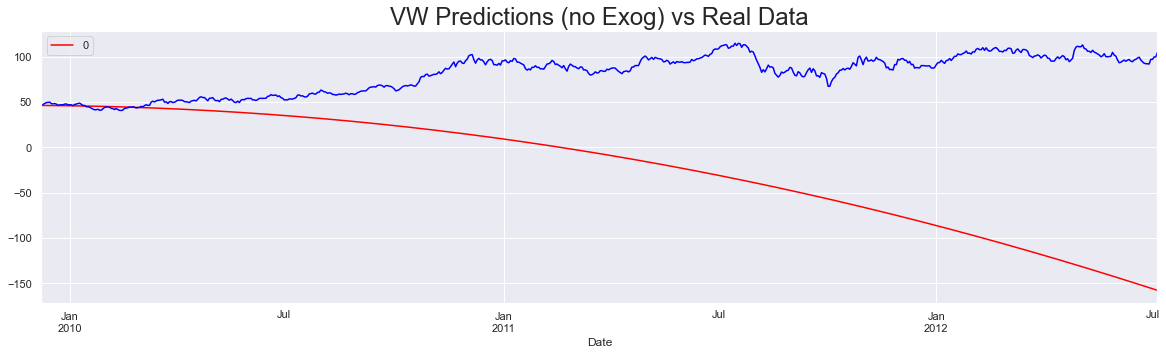

In [48]:
model_auto_pred_pr = auto_arima(df.volk[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.volk[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)
plt.show()

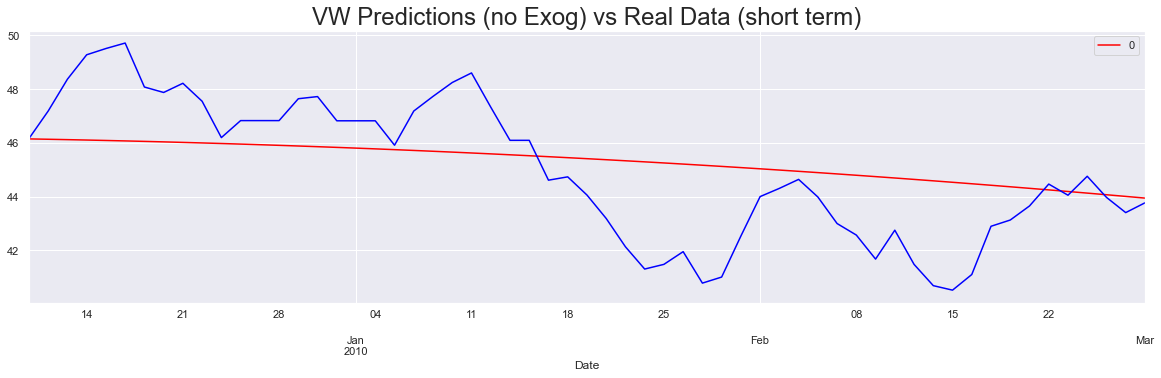

In [49]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.volk[ann_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

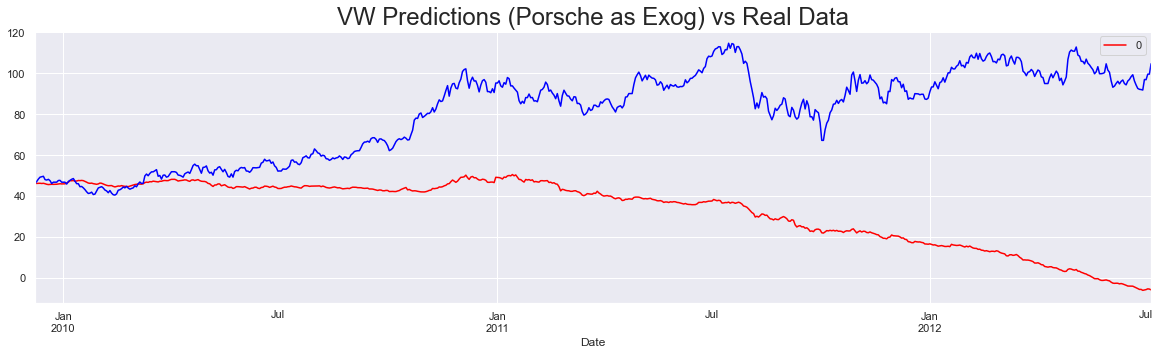

In [50]:
model_auto_pred_pr = auto_arima(df.volk[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.volk[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()

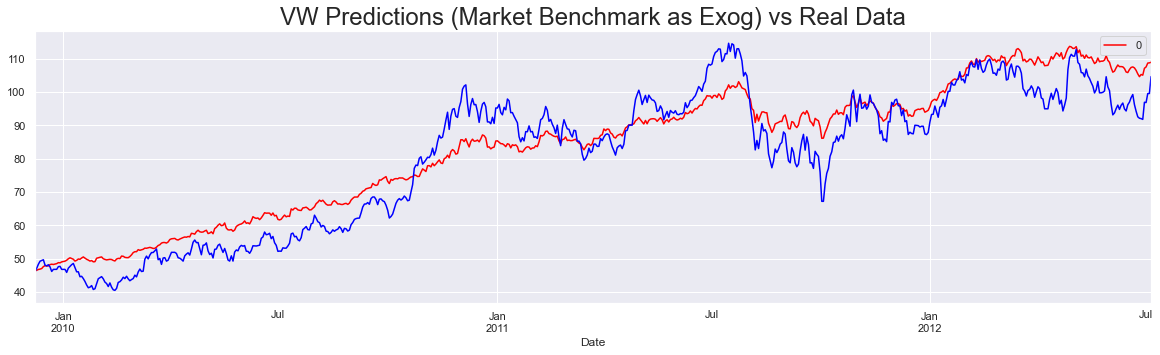

In [51]:
model_auto_pred_pr = auto_arima(df.volk[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.volk[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size = 24)
plt.show()

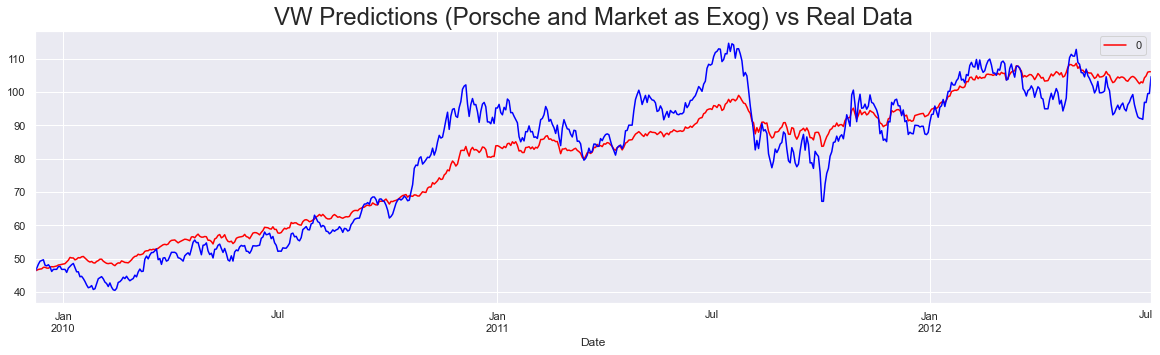

In [52]:
model_auto_pred_pr = auto_arima(df.volk[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.volk[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size = 24)
plt.show()

---

# Volatility

## Volatility of Volkswagen each period

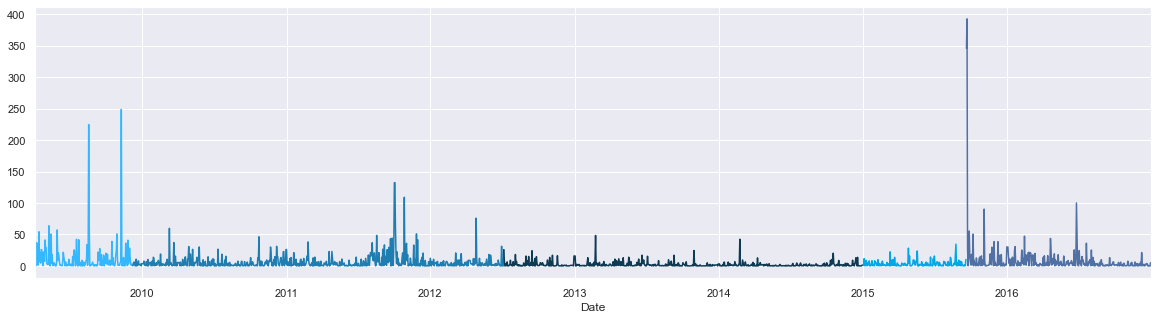

In [55]:
df['sq_volk'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")
df['sq_volk'][ann_1:ann_2].plot(color = "#1E7EB2")
df['sq_volk'][ann_2:end_date].plot(color = "#0E3A52")
df['sq_volk'][end_date:dieselgate_scandal].plot(color = '#00A8E8')
df['sq_volk'][dieselgate_scandal:aftermath].plot(color = '#5171A5')
plt.show()

## Volatility Trends for Each Period (Volkswagen)

In [65]:
model_garch_pre = arch_model(df.ret_volk[start_date:ann_1], mean = "Constant",  vol = "ARCH", p = 1, q = 1)
results_garch_pre = model_garch_pre.fit(update_freq = 5)

model_garch_btn = arch_model(df.ret_volk[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn = model_garch_btn.fit(update_freq = 5)

model_garch_post = arch_model(df.ret_volk[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post = model_garch_post.fit(update_freq = 5)

model_garch_pre_scandal = arch_model(df.ret_volk[end_date:dieselgate_scandal], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre_scandal = model_garch_pre_scandal.fit(update_freq = 5)

model_garch_post_scandal = arch_model(df.ret_volk[dieselgate_scandal:aftermath], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post_scandal = model_garch_post_scandal.fit(update_freq = 5)

Iteration:      5,   Func. Count:     24,   Neg. LLF: 474.99048490552934
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.99048260958864
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 7
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.7536631615062
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7317321781982
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.7317321769535
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1167.7462162193528
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1167.0852262849564
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     30,   Neg. LLF: 382.93573041407865
Iteration

In [66]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:               ret_volk   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -474.990
Distribution:                  Normal   AIC:                           955.981
Method:            Maximum Likelihood   BIC:                           965.526
                                        No. Observations:                  178
Date:                Thu, Jun 09 2022   Df Residuals:                      177
Time:                        18:35:02   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1572      0.301      0.523      0.601 [ -0.432,  0.746]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         10.6213      2.890      3.675  2.375e-04 [  4.957, 16.285]
alpha[1]       0.1539      0.266      0.578      0.563 [ -0.368,  0.676]
========================================================================

Covariance estimator: robust
"""

In [58]:
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               ret_volk   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Thu, Jun 09 2022   Df Residuals:                      671
Time:                        18:20:25   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [59]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               ret_volk   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1167.09
Distribution:                  Normal   AIC:                           2342.17
Method:            Maximum Likelihood   BIC:                           2360.08
                                        No. Observations:                  651
Date:                Thu, Jun 09 2022   Df Residuals:                      650
Time:                        18:20:25   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1076  6.080e-02      1.770  7.677e-02 [-1.157e-02,  0.227]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4839      0.362      1.335      0.182    [ -0.226,  1.194]
alpha[1]       0.1594      0.105      1.515      0.130 [-4.675e-02,  0.366]
beta[1]        0.6268      0.225      2.785  5.347e-03    [  0.186,  1.068]
===========================================================================

Covariance estimator: robust
"""

In [61]:
results_garch_pre_scandal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               ret_volk   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -382.290
Distribution:                  Normal   AIC:                           772.580
Method:            Maximum Likelihood   BIC:                           785.504
                                        No. Observations:                  187
Date:                Thu, Jun 09 2022   Df Residuals:                      186
Time:                        18:24:29   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0543      0.137     -0.396      0.692 [ -0.323,  0.215]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.7770      0.785      3.537  4.046e-04 [  1.238,  4.316]
alpha[1]       0.0938      0.133      0.704      0.481 [ -0.167,  0.355]
beta[1]        0.1188      0.208      0.572      0.567 [ -0.288,  0.526]
========================================================================

Covariance estimator: robust
"""

In [64]:
results_garch_post_scandal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               ret_volk   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -787.094
Distribution:                  Normal   AIC:                           1582.19
Method:            Maximum Likelihood   BIC:                           1597.44
                                        No. Observations:                  335
Date:                Thu, Jun 09 2022   Df Residuals:                      334
Time:                        18:27:00   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0567      0.126      0.450      0.652 [ -0.190,  0.303]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1582      0.220      0.718      0.473    [ -0.274,  0.590]
alpha[1]       0.0776  5.270e-02      1.473      0.141 [-2.567e-02,  0.181]
beta[1]        0.8898  7.999e-02     11.123  9.690e-29    [  0.733,  1.047]
===========================================================================

Covariance estimator: robust
"""

## Volatility Trends for Each Period (Volkswagen)

In [85]:
model_garch_pre_por = arch_model(df.ret_por[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre_por = model_garch_pre_por.fit(update_freq = 5)

model_garch_btn_por = arch_model(df.ret_por[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn_por = model_garch_btn_por.fit(update_freq = 5)

model_garch_post_por = arch_model(df.ret_por[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post_por = model_garch_post_por.fit(update_freq = 5)

model_garch_pre_scandal_por = arch_model(df.ret_por[end_date:dieselgate_scandal], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre_scandal_por = model_garch_pre_scandal_por.fit(update_freq = 5)

model_garch_post_scandal_por = arch_model(df.ret_por[dieselgate_scandal:aftermath], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post_scandal_por = model_garch_post_scandal_por.fit(update_freq = 5)

Iteration:      5,   Func. Count:     33,   Neg. LLF: 501.9288011660515
Iteration:     10,   Func. Count:     64,   Neg. LLF: 1261.373528008523
Iteration:     15,   Func. Count:     93,   Neg. LLF: 469.3205648628941
Optimization terminated successfully    (Exit mode 0)
            Current function value: 469.3205445860913
            Iterations: 18
            Function evaluations: 102
            Gradient evaluations: 17
Iteration:      5,   Func. Count:     35,   Neg. LLF: 84968.52033450757
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1620.0583104998946
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1783.7445451216713
Iteration:     10,   Func. Count:     66,   Neg. LLF: 1228.5357837866482
Iteration:     15,   Func. Count:     96,   Neg. LLF: 1230.4338003886685
Iteration:     20,   Func. Count:    126,   Neg. LLF: 1227.0178565019141
It

In [84]:
results_garch_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                ret_por   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -479.671
Distribution:                  Normal   AIC:                           965.341
Method:            Maximum Likelihood   BIC:                           974.887
                                        No. Observations:                  178
Date:                Thu, Jun 09 2022   Df Residuals:                      177
Time:                        19:05:11   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1514      0.277      0.546      0.585 [ -0.392,  0.695]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         11.8289      2.649      4.466  7.960e-06    [  6.638, 17.020]
alpha[1]       0.0891  7.472e-02      1.192      0.233 [-5.738e-02,  0.236]
===========================================================================

Covariance estimator: robust
"""

In [77]:
results_garch_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_por   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1620.06
Distribution:                  Normal   AIC:                           3248.12
Method:            Maximum Likelihood   BIC:                           3266.16
                                        No. Observations:                  672
Date:                Thu, Jun 09 2022   Df Residuals:                      671
Time:                        18:56:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0618  9.670e-02      0.639      0.523 [ -0.128,  0.251]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1749  8.959e-02      1.953  5.087e-02 [-6.648e-04,  0.351]
alpha[1]       0.0702  2.165e-02      3.243  1.181e-03  [2.778e-02,  0.113]
beta[1]        0.9107  2.513e-02     36.239 1.484e-287    [  0.861,  0.960]
===========================================================================

Covariance estimator: robust
"""

In [78]:
results_garch_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_por   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1222.80
Distribution:                  Normal   AIC:                           2453.60
Method:            Maximum Likelihood   BIC:                           2471.51
                                        No. Observations:                  651
Date:                Thu, Jun 09 2022   Df Residuals:                      650
Time:                        18:56:06   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0836  6.179e-02      1.352      0.176 [-3.754e-02,  0.205]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.7781e-08  3.502e-03  7.933e-06      1.000 [-6.864e-03,6.864e-03]
alpha[1]   1.8374e-09  8.948e-04  2.053e-06      1.000 [-1.754e-03,1.754e-03]
beta[1]        0.9986  1.029e-03    970.257      0.000      [  0.997,  1.001]
=============================================================================

Covariance estimator: robust
"""

In [79]:
results_garch_pre_scandal_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_por   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -371.433
Distribution:                  Normal   AIC:                           750.866
Method:            Maximum Likelihood   BIC:                           763.791
                                        No. Observations:                  187
Date:                Thu, Jun 09 2022   Df Residuals:                      186
Time:                        18:56:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0251      0.132     -0.190      0.849 [ -0.284,  0.234]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.6659      0.745      3.580  3.434e-04    [  1.206,  4.125]
alpha[1]       0.0844  8.444e-02      1.000      0.317 [-8.108e-02,  0.250]
beta[1]        0.0640      0.211      0.303      0.762    [ -0.350,  0.478]
===========================================================================

Covariance estimator: robust
"""

In [80]:
results_garch_post_scandal_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_por   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -760.580
Distribution:                  Normal   AIC:                           1529.16
Method:            Maximum Likelihood   BIC:                           1544.42
                                        No. Observations:                  335
Date:                Thu, Jun 09 2022   Df Residuals:                      334
Time:                        18:56:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0910      0.112      0.810      0.418 [ -0.129,  0.311]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2298      0.240      0.957      0.339    [ -0.241,  0.701]
alpha[1]       0.1396  8.201e-02      1.702  8.875e-02 [-2.115e-02,  0.300]
beta[1]        0.8152      0.110      7.395  1.409e-13    [  0.599,  1.031]
===========================================================================

Covariance estimator: robust
"""

---

# Number of stocks traded

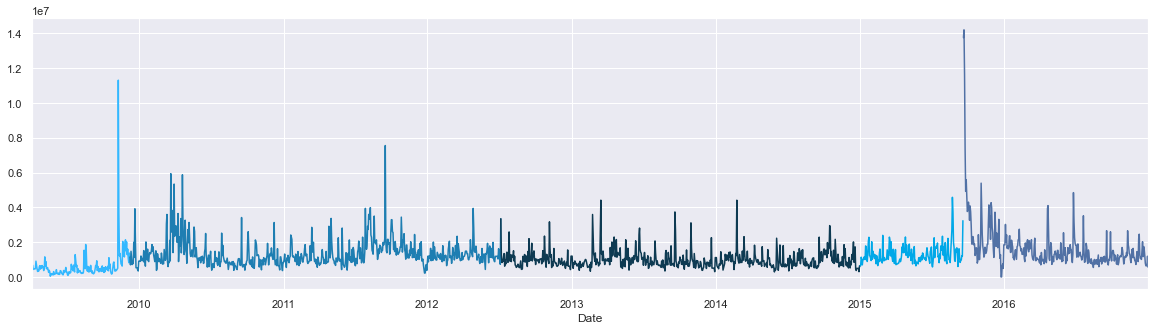

In [73]:
plt.figure(figsize = (20,5))
df['q_volk'][start_date:ann_1].plot(color = "#33B8FF")
df['q_volk'][ann_1:ann_2].plot(color = "#1E7EB2")
df['q_volk'][ann_2:end_date].plot(color = "#0E3A52")
df['q_volk'][end_date:dieselgate_scandal].plot(color = '#00A8E8')
df['q_volk'][dieselgate_scandal:aftermath].plot(color = '#5171A5')
plt.show()

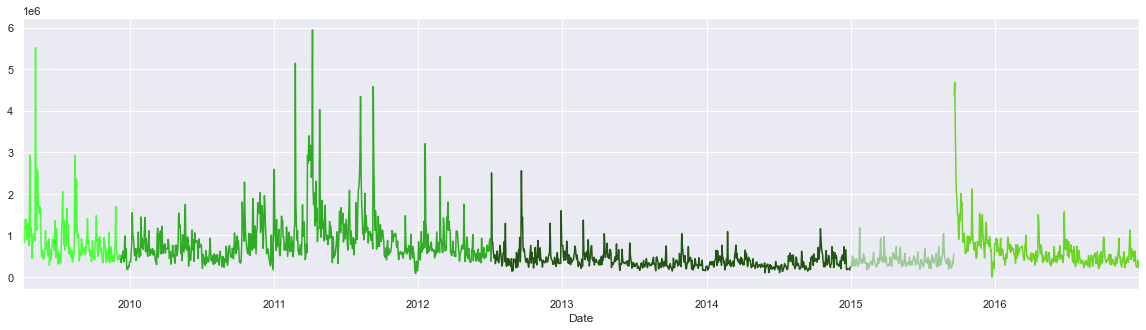

In [72]:
plt.figure(figsize = (20,5))
df['q_por'][start_date:ann_1].plot(color = "#49FF3A")
df['q_por'][ann_1:ann_2].plot(color = "#2FAB25")
df['q_por'][ann_2:end_date].plot(color = "#225414")
df['q_por'][end_date: dieselgate_scandal].plot(color = "#9BC995")
df['q_por'][dieselgate_scandal:aftermath].plot(color = "#6BD425")
plt.show()

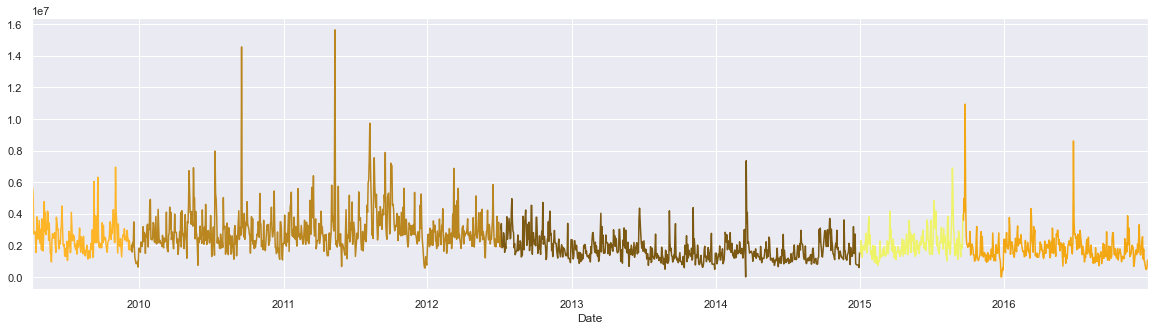

In [74]:
plt.figure(figsize = (20,5))
df['q_bmw'][ann_1:ann_2].plot(color = "#BA861F")
df['q_bmw'][start_date:ann_1].plot(color = "#FEB628")
df['q_bmw'][ann_2:end_date].plot(color = "#7C5913")
df['q_bmw'][end_date: dieselgate_scandal].plot(color = "#EEF36A")
df['q_bmw'][dieselgate_scandal:aftermath].plot(color = "#F3A712")
plt.show()